# TFM.

# Análisis de correlaciones

### Secciones

- Hallando todas las correlaciones posibles
- Visualizando descriptores con correlación baja y alta

In [15]:
import pyodbc 

server = 'XXX' 
database = 'bioe' 
username = 'bioe' 
password = 'XXX' 
trusted = 'yes;' 

cnxn = pyodbc.connect('Driver={SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=no;'+username+';PWD='+ password)
cursor = cnxn.cursor()

query = "SELECT * FROM [bioe].[TFM].[tfm_NNaN0] ();"

import pandas as pd

df = pd.read_sql_query(query, cnxn)
print(df.head(5))
#print(df.loc[0,:])
#print(df[["CP_BFKV","CP_BL"]])

      Complex  benchmark         dG  CP_BFKV  CP_BL  CP_BT  CP_GKS  CP_HLPL  \
0   1A2K_C:AB          1  -9.308979  -0.8654 -6.506  -5.48    -8.0    -28.6   
1    1ACB_E:I          1 -13.053546  -2.3756 -6.130  -7.74    -2.4    -34.0   
2   1AHW_AB:C          1 -11.552512  -1.0114 -8.650  -4.96   -14.0    -34.2   
3    1AK4_A:D          1  -6.432684   1.1344 -2.076  -3.98    -4.0    -12.0   
4  1AKJ_AB:DE          1  -5.319762   1.5450 -4.558   2.74   -10.0    -26.8   

   CP_MJPL  CP_MJ3h  ...  AP_PISA  FIREDOCK  FIREDOCK_AB  FIREDOCK_EI  \
0   -140.8    -2.96  ...  -0.2445    -58.02       -71.00       -25.76   
1   -178.0   -11.50  ...  -0.4878    -88.88       -96.94       -62.16   
2   -196.2     2.36  ...  -0.0288    -36.54       -67.22        -3.33   
3   -122.4    -2.90  ...  -0.2250    -42.73       -47.67       -29.09   
4   -191.2     4.64  ...  -0.2936    -45.19       -67.13        -4.81   

     CP_PIE   CP_DDG_U   CP_DDG_W   AP_DDG_U   AP_DDG_W      DDG_V  
0  1.138510  -4.5

C:\Users\coept\AppData\Local\Temp\ipykernel_17668\2432947764.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


#### Hallando todas las correlaciones posibles

In [16]:
import numpy as np

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

df_corr = df.corr(method='pearson')
print(df_corr.columns)
print(df_corr.iloc[0])
#print(df_corr.head(0))

print(df.corr(method='pearson')["dG"]["CP_BFKV"])

from pathlib import Path  
filepath = Path('../tmp/df_corr.csv')  
df_corr.to_csv(filepath)


Index(['benchmark', 'dG', 'CP_BFKV', 'CP_BL', 'CP_BT', 'CP_GKS', 'CP_HLPL',
       'CP_MJPL', 'CP_MJ3h', 'CP_MJ2h', 'CP_MJ1', 'CP_MJ2', 'CP_MSBM', 'CP_MS',
       'CP_Qa', 'CP_Qm', 'CP_Qp', 'CP_RO', 'CP_SKOb', 'CP_SKOa', 'CP_SJKG',
       'CP_TD', 'CP_TEl', 'CP_TEs', 'CP_TS', 'CP_VD', 'CP_SKOIP',
       'AP_DCOMPLEX', 'AP_dDFIRE', 'AP_DFIRE2', 'CP_RMFCEN1', 'CP_RMFCEN2',
       'CP_RMFCA', 'CP_TB', 'CP_TSC', 'AP_T1', 'AP_T2', 'AP_DOPE',
       'AP_DOPE_HR', 'AP_ACE', 'INSIDE', 'HBOND', 'PI_PI', 'CAT_PI', 'ALIPH',
       'ZRANK', 'ZRANK2', 'ROT_S', 'TRANS_S', 'NIPacking', 'NSC', 'FA_ATR',
       'FA_REP', 'LK_SOLV', 'FA_PP', 'CG_VDW', 'CG_PP', 'CG_ENV', 'CG_BETA',
       'HBOND2', 'AA_PROP', 'ROSETTADOCK', 'NHB', 'ELE', 'DESOLV', 'VDW',
       'PYDOCK_TOT', 'ODA', 'PROPNSTS', 'SIPPER', 'AP_OPUS_PSP',
       'AP_GEOMETRIC', 'AP_DARS', 'AP_URS', 'AP_MPS', 'AP_W1', 'CP_D1',
       'AP_calRW', 'AP_calRWp', 'AP_PISA', 'FIREDOCK', 'FIREDOCK_AB',
       'FIREDOCK_EI', 'CP_PIE', 'CP_DDG_U', 'CP

C:\Users\coept\AppData\Local\Temp\ipykernel_17668\825341435.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='pearson')
C:\Users\coept\AppData\Local\Temp\ipykernel_17668\825341435.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method='pearson')["dG"]["CP_BFKV"])


#### Visualizando descriptores con correlación baja y alta

In [17]:
print(df[['AP_calRWp']].idxmin())


AP_calRWp    130
dtype: int64


['CP_Qm', 'CP_MS', 'correlación baja', 'red']
CP_Qm
CP_MS
correlación baja
red


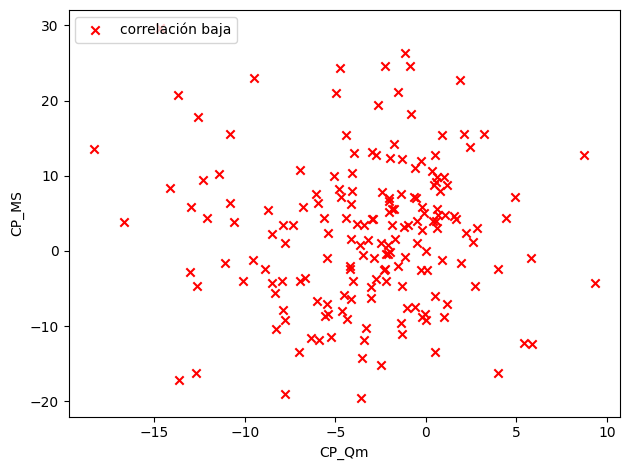

['AP_calRWp', 'AP_calRW', 'correlación alta', 'green']
AP_calRWp
AP_calRW
correlación alta
green


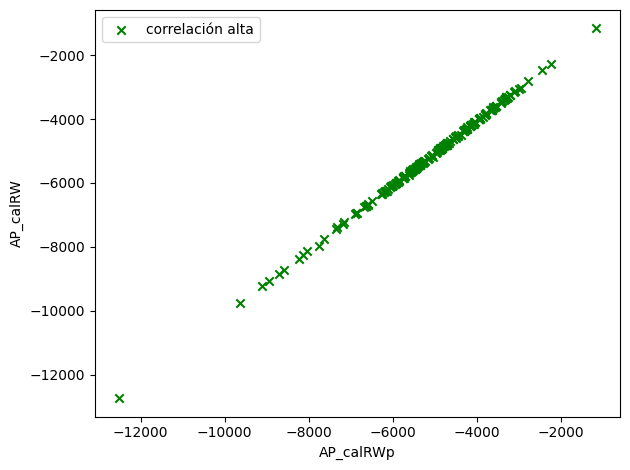

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

lista_descriptores = [["CP_Qm","CP_MS","correlación baja","red"],["AP_calRWp","AP_calRW","correlación alta","green"]]
for idesc in lista_descriptores:
    print(idesc)
    for iclasif in idesc:
        print(iclasif)

    descriptor1 = idesc[0]
    descriptor2 = idesc[1]

    y = df[[descriptor2]].values
    X = df[[descriptor1]].values

    # plot data
    plt.scatter(y, X, color=idesc[3], marker='x', label=idesc[2])

    plt.xlabel(descriptor1)
    plt.ylabel(descriptor2)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig('../tmp/corr_'+idesc[2]+'.png', dpi=300)
    plt.show()
